In [1]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

def decision(probability):
    return random.random() < probability

In [3]:
decision(0.5)

False

In [4]:
with open("Data/North/target_train_cl.pkl", 'rb') as f:
    target_train_cl = pickle.load(f)

In [5]:
target_train_cl.shape

torch.Size([14036, 140256])

In [6]:
pr_points = []
for i in range(target_train_cl.shape[1]):
    pr_points.append(target_train_cl[:,i].nansum())
pr_points = np.array(pr_points)

In [7]:
pr_points.shape

(140256,)

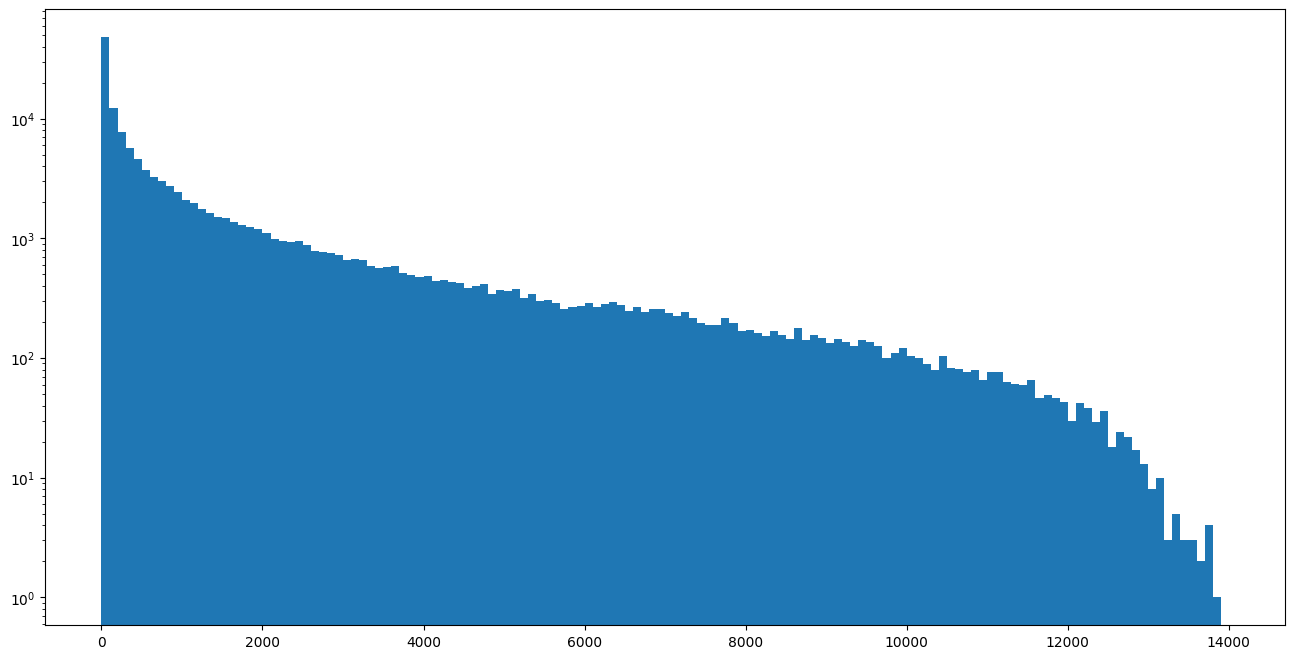

In [8]:
binwidth = 100
fig, ax = plt.subplots(figsize=(16,8))
b = plt.hist(pr_points, bins=range(0, target_train_cl.shape[0], binwidth))
ax.set_yscale('log')

In [9]:
b[0][:10].sum(), b[0][10:].sum()

(93518.0, 46738.0)

In [10]:
b[1][:10]

array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.])

In [11]:
def rand(pop_size, num_samples):
    """Use random.sample to generate indices."""
    return torch.Tensor(random.sample(range(pop_size), num_samples)).int()

In [12]:
target_train_cl_us = torch.ones(target_train_cl.shape) * torch.nan
for i in range(target_train_cl.shape[1]):
    pr_points = target_train_cl[:,i].nansum()
    if pr_points >= 10000:
        target_train_cl_us[:,i] = target_train_cl[:,i]
    elif pr_points >= 1000:
        target_train_cl_us[:,i] = target_train_cl[:,i]
        balance_mask = ~(target_train_cl[:,i] == 1) # how many indexes are 0
        idxs = rand(balance_mask.sum(), balance_mask.sum() // 2)
        target_train_cl_us[:,i][balance_mask][idxs] = torch.nan
    elif decision(0.1):
        target_train_cl_us[:,i] = target_train_cl[:,i]

: 

In [ ]:
# target_train_cl_us = torch.ones(target_train_cl.shape) * torch.nan
# for i in range(target_train_cl.shape[1]):
#     pr_points = target_train_cl[:,i].nansum()
#     if pr_points >= 10000:
#         target_train_cl_us[:,i] = target_train_cl[:,i]
#     elif pr_points >= 7000 and decision(0.35):
#         target_train_cl_us[:,i] = target_train_cl[:,i]
#     elif pr_points >= 2500 and decision(0.15):
#         target_train_cl_us[:,i] = target_train_cl[:,i]
#     elif pr_points >= 1250 and decision(0.05):
#         target_train_cl_us[:,i] = target_train_cl[:,i]
#     elif pr_points >= 100 and decision(0.01):
#         target_train_cl_us[:,i] = target_train_cl[:,i]
#     elif decision(0.001):
#         target_train_cl_us[:,i] = target_train_cl[:,i]

In [ ]:
target_train_cl_us.shape

torch.Size([14036, 140256])

In [ ]:
pr_points_us = []
for i in range(target_train_cl_us.shape[1]):
    pr_points_us.append(target_train_cl_us[:,i].sum())
pr_points_us = np.array(pr_points_us)

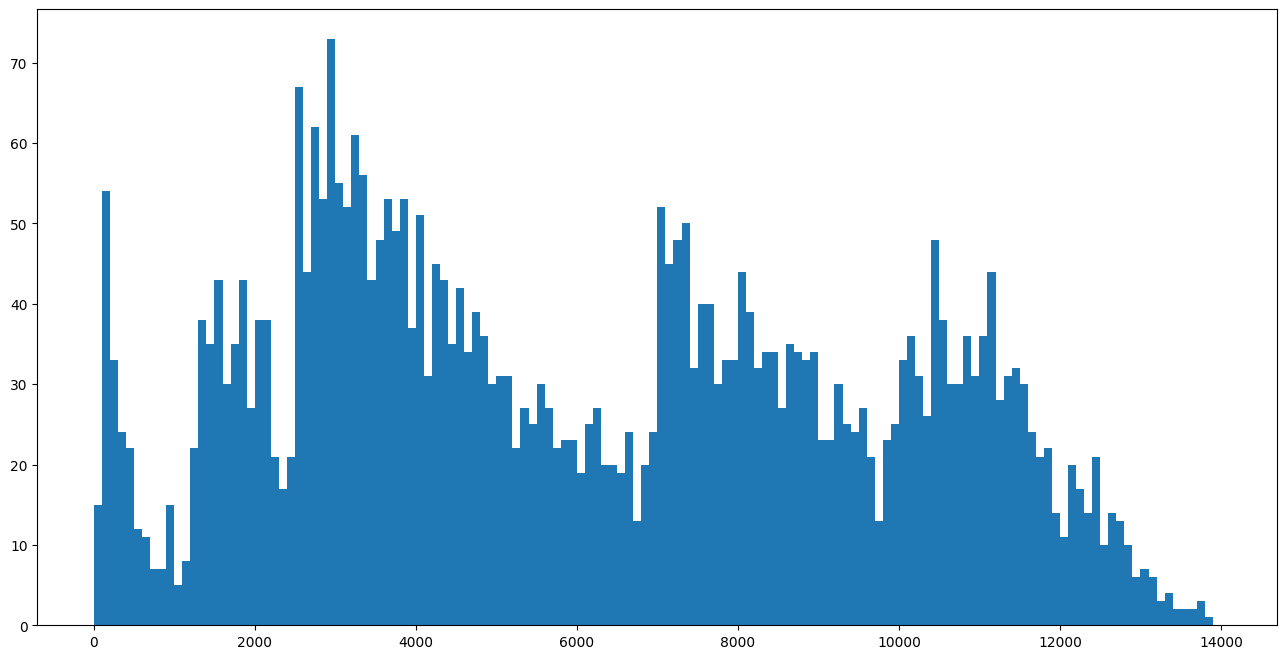

In [ ]:
binwidth = 100
fig, ax = plt.subplots(figsize=(16,8))
b = plt.hist(pr_points_us, bins=range(0, target_train_cl_us.shape[0], binwidth))
# ax.set_yscale('log')

In [ ]:
b[0][:10].sum(), b[0][10:].sum()

(200.0, 3855.0)

In [ ]:
target_train_cl_us[~torch.isnan(target_train_cl_us)].sum() / len(target_train_cl_us[~torch.isnan(target_train_cl_us)]) * 100

tensor(44.1146)

In [ ]:
target_train_cl[~torch.isnan(target_train_cl)].sum() / len(target_train_cl_us[~torch.isnan(target_train_cl)]) * 100

tensor(10.4154)

In [ ]:
with open("Data/North/target_train_cl_us.pkl", 'wb') as f:
    pickle.dump(target_train_cl_us, f)